# Text Analysis using NLTK

Solving an NLP problem is a multi-stage process. We need to clean the unstructured text data first before we can even think about getting to the modeling stage. Cleaning the data consists of a few key steps:

## Tokenization  

Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.** Tokenization is the very first step in text analysis. 

* **Sentence tokenization**: split a document or paragraph into sentences
sentence tokenization uses a pre-trained model from nltk_data/tokenizers/punkt/english.pickle.You can also specify other languages. The NLTK data package includes a pre-trained Punkt tokenizer for
English.Punkt knows that the period in Mr. Smith does not mark sentence boundaries and sometimes sentences can start with non-capitalized words

* **Word tokenization** :  split a sentence into tokens or words

### Sentence tokenization

In [38]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

text = "Hi Mr. Smith, how are you doing today? The weather is great, and city is awesome. The sky is pinkish-blue."

tokenized_text = sent_tokenize(text)

tokenized_text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Personal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Hi Mr. Smith, how are you doing today?',
 'The weather is great, and city is awesome.',
 'The sky is pinkish-blue.']

In [39]:
#18 languages supported
text_dutch = u'''Hallo meneer Smith, hoe gaat het vandaag met u? Het weer is geweldig, en de stad is geweldig.
De lucht is roze-blauw.'''

tokenized_dutch = sent_tokenize(text_dutch, language='dutch')
tokenized_dutch

['Hallo meneer Smith, hoe gaat het vandaag met u?',
 'Het weer is geweldig, en de stad is geweldig.',
 'De lucht is roze-blauw.']

### Word Tokenization

In [40]:
from nltk.tokenize import word_tokenize

text = "Hi Mr. Smith, how are you doing today?"

tokens = word_tokenize(text)

tokens

['Hi', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?']

## Frequency Distribution  

It shows the number of occurances of a word in a sentence.

In [41]:
from nltk.probability import FreqDist

text = "Hi Mr. Smith, how are you doing today? Good to see you Mr. Smith."

tokenized_word = word_tokenize(text)

fdist = FreqDist(tokenized_word)

display(fdist)

FreqDist({'Mr.': 2, 'Smith': 2, 'you': 2, 'Hi': 1, ',': 1, 'how': 1, 'are': 1, 'doing': 1, 'today': 1, '?': 1, ...})

In [42]:
print("Most common:", fdist.most_common(2))

Most common: [('Mr.', 2), ('Smith', 2)]


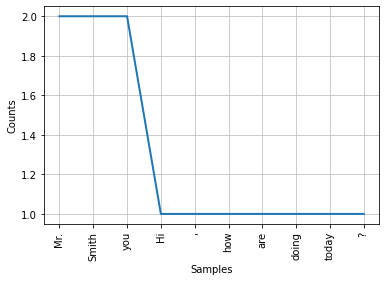

In [43]:
import matplotlib.pyplot as plt

fdist.plot(10, cumulative=False)
plt.show()

## Stopwords  
Stopwords considered as noise in the text. Text may contain stop words such as is, am, are, this, a, an, the, etc.
In NLTK for removing stopwords, you need to create a list of stopwords and filter out your list of tokens from these words.

In [44]:
from nltk.corpus import stopwords
nltk.download('stopwords')

## you can make a list of your stopwords that want to exclude or use the list from the library
# wordslist = ['so', 'are', 'not']
# stop_words = set(wordslist)

stop_words = set(stopwords.words('english'))
# stop_words

text = "Hi Mr. Smith, how are you doing today?"

tokenized_word = word_tokenize(text)

tokenized_word

filtered_list =[]
for word in tokenized_word:
    if word not in stop_words:
        filtered_list.append(word)
        
display(filtered_list)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Personal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['Hi', 'Mr.', 'Smith', ',', 'today', '?']

## De-Punctuate

In [45]:
from nltk.tokenize import RegexpTokenizer

text = "Hi Mr. Smith, how are you doing today?"

tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize(text)

['Hi', 'Mr', 'Smith', 'how', 'are', 'you', 'doing', 'today']

## Lexicon Normalization  

Lexicon normalization considers another type of noise in the text. For example, connection, connected, connecting word reduce to a common word "connect". It reduces derivationally related forms of a word to a common root word.


### 1. Stemming 
Stemming is a process of linguistic normalization, which reduces words to their word root word or chops off the derivational affixes

In [46]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

words = ['doing', 'giving', 'caring', 'chocolates', 'flying']

for word in words:
    print(ps.stem(word))

do
give
care
chocol
fli


### 2. Lemmatization  
Lemmatization reduces words to their base word, which is linguistically correct lemmas. It transforms root word with the use of vocabulary and morphological analysis. Lemmatization is usually more sophisticated than stemming. Stemmer works on an individual word without knowledge of the context. For example, The word "better" has "good" as its lemma. This thing will miss by stemming because it requires a dictionary look-up.

In [47]:
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
from nltk.stem import PorterStemmer

lem = WordNetLemmatizer()

stem = PorterStemmer()

word = 'flying'

lemmatized_word = lem.lemmatize(word, 'v')
stemmed_word = stem.stem(word)
display(lemmatized_word)
display(stemmed_word)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Personal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'fly'

'fli'

## POS Tagging

The primary target of Part-of-Speech(POS) tagging is to identify the grammatical group of a given word. Whether it is a NOUN, PRONOUN, ADJECTIVE, VERB, ADVERBS, etc. based on the context. POS Tagging looks for relationships within the sentence and assigns a corresponding tag to the word.

In [48]:
nltk.download('averaged_perceptron_tagger')

sent = 'Mr. Smith, how are you doing today?'

tokens = word_tokenize(sent)

nltk.pos_tag(tokens)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Personal\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Mr.', 'NNP'),
 ('Smith', 'NNP'),
 (',', ','),
 ('how', 'WRB'),
 ('are', 'VBP'),
 ('you', 'PRP'),
 ('doing', 'VBG'),
 ('today', 'NN'),
 ('?', '.')]



<img src="Picture1.png">

## Name Entity Recognition  
Named-entity recognition is a subtask of information extraction that seeks to locate and classify named entities mentioned in unstructured text into pre-defined categories such as person names, organizations, locations, medical codes, time expressions, quantities, monetary values, percentages,

In [49]:
from nltk import ne_chunk
# nltk.download('maxent_ne_chunker')
# nltk.download('words')

text_ne = "Donald Trump lives in the White House"

tokens = word_tokenize(text_ne)

tags = nltk.pos_tag(tokens)

chunks = ne_chunk(tags)
display(chunks)

OSError: [WinError 193] %1 is not a valid Win32 application

Tree('S', [Tree('PERSON', [('Donald', 'NNP')]), Tree('PERSON', [('Trump', 'NNP')]), ('lives', 'VBZ'), ('in', 'IN'), ('the', 'DT'), Tree('FACILITY', [('White', 'NNP'), ('House', 'NNP')])])

## Searching text  
There are many ways to examine the context of a text apart from simply reading it.

In [50]:
nltk.download('gutenberg')
nltk.download('genesis')
nltk.download('inaugural')
nltk.download('nps_chat')
nltk.download('webtext')
nltk.download('treebank')
from nltk.book import *

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Personal\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package genesis to
[nltk_data]     C:\Users\Personal\AppData\Roaming\nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Personal\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package nps_chat to
[nltk_data]     C:\Users\Personal\AppData\Roaming\nltk_data...
[nltk_data]   Package nps_chat is already up-to-date!
[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\Personal\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\Personal\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!


*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


### Concordance

A concordance view shows us every occurrence of a given word, together with some context. For example, we saw that monstrous occurred in contexts such as the _ pictures and a _ size

In [51]:
text2.concordance("monstrous")

Displaying 11 of 11 matches:
. " Now , Palmer , you shall see a monstrous pretty girl ." He immediately went
your sister is to marry him . I am monstrous glad of it , for then I shall have
ou may tell your sister . She is a monstrous lucky girl to get him , upon my ho
k how you will like them . Lucy is monstrous pretty , and so good humoured and 
 Jennings , " I am sure I shall be monstrous glad of Miss Marianne ' s company 
 usual noisy cheerfulness , " I am monstrous glad to see you -- sorry I could n
t however , as it turns out , I am monstrous glad there was never any thing in 
so scornfully ! for they say he is monstrous fond of her , as well he may . I s
possible that she should ." " I am monstrous glad of it . Good gracious ! I hav
thing of the kind . So then he was monstrous happy , and talked on some time ab
e very genteel people . He makes a monstrous deal of money , and they keep thei


### Similar

What other words appear in a similar range of contexts? We can find out by appending the term similar to the name of the text in question, then inserting the relevant word in parentheses:

In [52]:
text2.similar("monstrous")

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


### Common Contexts 
The term common_contexts allows us to examine just the contexts that are shared by two or more words, such as monstrous and very.

In [53]:
text2.common_contexts(['monstrous', 'very'])

am_glad a_pretty a_lucky is_pretty be_glad


### Dispersion Plot

It is one thing to automatically detect that a particular word occurs in a text, and to display some words that appear in the same context. However, we can also determine the location of a word in the text: how many words from the beginning it appears. This positional information can be displayed using a dispersion plot. 

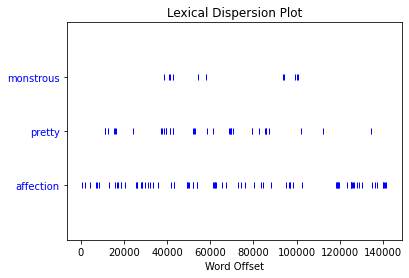

Total number of characters: 141576


In [54]:
from nltk.draw.dispersion import dispersion_plot

dispersion_plot(text2, ['monstrous', 'pretty', 'affection'])

print('Total number of characters:', (len(text2)))

141576

In [55]:
f=open(r'C:\Users\Personal\Desktop\TechTalk-text mining\tkamb.txt','rU')
raw=f.read()
tokens = word_tokenize(raw)
text_mb = nltk.Text(tokens)

C:\Users\Personal\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 'U' mode is deprecated
  """Entry point for launching an IPython kernel.


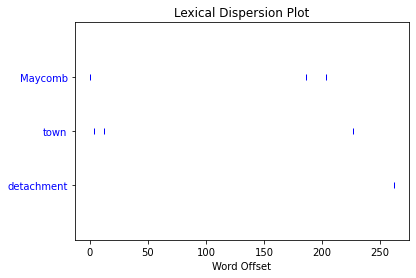

In [56]:
dispersion_plot(text_mb, ['Maycomb', 'town', 'detachment'])

In [24]:
len(tokens)

## Collocations and N-grams

A collocation is a sequence of words that occur together unusually often. Thus red wine is a collocation, whereas the wine is not. A characteristic of collocations is that they are resistant to substitution with words that have similar senses; for example, maroon wine sounds definitely odd.

To get a handle on collocations, we start off by extracting from a text a list of word pairs, also known as bigrams. This is easily accomplished with the function bigrams():

In [59]:
from nltk import ngrams

text = 'I am glad to see you'

tokens = word_tokenize(text)

tokens

list(ngrams(tokens, 3))

[('I', 'am', 'glad'),
 ('am', 'glad', 'to'),
 ('glad', 'to', 'see'),
 ('to', 'see', 'you')]

In [60]:
text2.collocations()

Colonel Brandon; Sir John; Lady Middleton; Miss Dashwood; every thing;
thousand pounds; dare say; Miss Steeles; said Elinor; Miss Steele;
every body; John Dashwood; great deal; Harley Street; Berkeley Street;
Miss Dashwoods; young man; Combe Magna; every day; next morning


In [61]:
sorted(set(tokens))

['I', 'am', 'glad', 'see', 'to', 'you']

In [62]:
len(set(tokens))

6